<a href="https://colab.research.google.com/github/elashgari/EEGNet/blob/master/Recitation_class_(LDA_and_K_NN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Comparison of LDA and PCA 2D projection of Iris datase

* Both LDA and PCA are linear transformation techniques: LDA is a supervised whereas PCA is unsupervised – PCA ignores class labels.

explained variance ratio (first two components): [0.92461872 0.05306648]


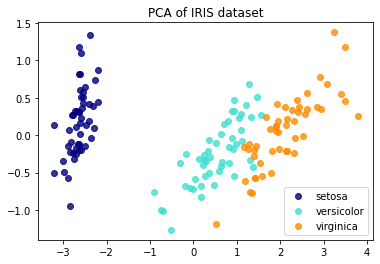

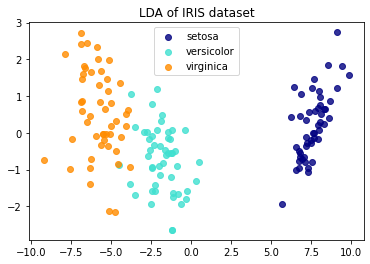

In [11]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

################################################################################
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis()
X_r2 = lda.fit(X, y).transform(X)
################################################################################
# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']


for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

plt.show()


## K-NN
#Pros:
* No assumptions about data — useful, for example, for nonlinear data
* Simple algorithm — to explain and understand/interpret
* High accuracy (relatively) — it is pretty high but not competitive in comparison to better supervised learning models
* useful for classification or regression

#Cons:
* Computationally expensive — because the algorithm stores all of 
the training data
* High memory requirement
* Prediction stage might be slow 
* Sensitive to many features and the scale of the data

In [1]:
# import the iris dataset

from sklearn.datasets import load_iris
iris = load_iris()
print(iris.data.shape)
iris.data
print(iris.feature_names)
# print(iris.target)
print(iris.target_names) # 3 classes

(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [2]:
# splitting the data into training and test sets(80:20)
X, y = load_iris(return_X_y=True)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)


(120, 4) (120,)
(30, 4) (30,)


In [3]:
# import the K-NN classifier from sklearn
from sklearn.neighbors import KNeighborsClassifier

# import metrics model to check the accuracy
from sklearn import metrics

# train and test k-NN classifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print(score)

0.9666666666666667


# How we can select the hyperparameter(k)?
* Plot the relationship between the values of K and the corresponding testing accuracy
* Larger K value leads to smoother decision boundary (less complex model and underfitting). Smaller K leads to more complex model (may lead to overfitting)

<img src='https://miro.medium.com/max/1200/1*KnHPL7Uz6YMPrLyfHCRv9w.png'> <img src='https://miro.medium.com/max/1200/1*3c_zuzuCaA_NtCTdfT3L5g.png'>.

In [4]:
k_range = range(1,25)
scores = {}
scores_list = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  scores[k] = metrics.accuracy_score(y_test, y_pred)
  scores_list.append(metrics.accuracy_score(y_test, y_pred))



Text(0, 0.5, 'testing accuracy')

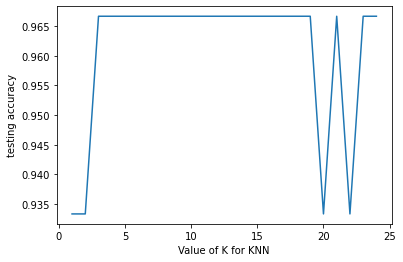

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(k_range, scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('testing accuracy')

**In our case we can see that for a K value of 3 to 19 our model accuracy is 96.6%. For our final model we can choose a optimal value of K as 5 (which falls between 3 and 19)**

In [7]:
#https://towardsdatascience.com/knn-in-python-835643e2fb53